Hands-on Pattern Recognition for Image Processing
---

In [5]:
import keras
import tensorflow
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print(keras.__version__)
print(tensorflow.__version__)
print(np.__version__)
print(matplotlib.__version__)

2.2.5
1.15.0
1.17.3
3.1.1


In [8]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%matplotlib inline
# set default size of plots
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

## Functions

In [0]:
def zero_pad(X, pad):
  return np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=0)

def conv_single_step(a_slice_prev, W, b):
  s = np.multiply(a_slice_prev, W)

  Z = np.sum(s)

  Z = Z + np.float(b)

  return Z

def conv_forward(A_prev, W, b, hparameters):

  (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

  (f, f, n_C_prev, n_C) = W.shape

  (stride, pad) = (hparameters['stride'], hparameters['pad'])

  n_H = int((n_H_prev - f + 2*pad)/stride) + 1
  n_W = int((n_W_prev - f + 2*pad)/stride) + 1

  Z = np.zeros((m, n_H, n_W, n_C))

  A_prev_pad = zero_pad(A_prev, pad)

  for i in range(m):
    a_prev_pad = A_prev_pad[i]
    for h in range(n_H):
      for w in range(n_W):
        for c in range(n_C):
          vert_start = h * stride
          vert_end = vert_start + f
          horiz_start = w * stride
          horiz_end = horiz_start + f

          a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]

          Z[i, h, w, c] = conv_single_step(a_slice_prev, W[:, :, :, c], b[:, :, :, c])
  
  assert(Z.shape == (m, n_H, n_W, n_C))

  cache = (A_prev, W, b, hparameters)

  return Z, cache

def pool_forward(A_prev, hparameters, mode = None):
  mode = "max" if mode is None else mode

  (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

  (f, stride) = (hparameters["f"], hparameters["stride"])

  n_H = int(1 + (n_H_prev - f)/stride)
  n_W = int(1 + (n_W_prev - f)/stride)
  n_C = n_C_prev

  A = np.zeros((m, n_H, n_W, n_C))

  for i in range(m):
    for h in range(n_H):
      for w in range(n_W):
        for c in range(n_C):
          (vert_start, vert_end) = (h*stride, h*stride + f)
          (horiz_start, horiz_end) = (w*stride, w*stride + f)

          a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]

          if mode == "max":
            A[i, h, w, c] = np.max(a_prev_slice)
          elif mode == "average":
            A[i, h, w, c] = np.average(a_prev_slice)
  
  cache = (A_prev, hparameters)

  assert(A.shape == (m, n_H, n_W, n_C))

  return A, cache

## Hands-on

x.shape = (4, 3, 3, 2)
x_pad.shape = (4, 7, 7, 2)
x[1,1] = [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


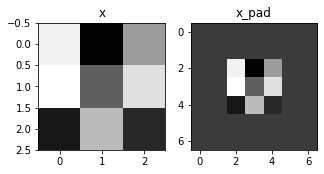

In [29]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)

print("x.shape =", x.shape)
print("x_pad.shape =", x_pad.shape)
print("x[1,1] =", x[1, 1])
print("x_pad[1,1] =", x_pad[1, 1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

In [14]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = -6.999089450680221


In [19]:
np.random.seed(1)
A_prev = np.random.randn(10, 4, 4, 3)
W = np.random.randn(2, 2, 3, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad": 2, "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =", np.mean(Z))
print("Z[3,2,1] =", Z[3,2,1])
print("cache_conv[0][1][2][3] =", cache_conv[0][1][2][3])

Z's mean = 0.048995203528855794
Z[3,2,1] = [-0.61490741 -6.7439236  -2.55153897  1.75698377  3.56208902  0.53036437
  5.18531798  8.75898442]
cache_conv[0][1][2][3] = [-0.20075807  0.18656139  0.41005165]


In [26]:
np.random.seed(1)
A_prev = np.random.randn(2, 4, 4, 3)
hparameters = {"stride": 2, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A =", A)
print()
A, cache = pool_forward(A_prev, hparameters, "average")
print("mode = average")
print("A =", A)

mode = max
A = [[[[1.74481176 0.86540763 1.13376944]]]


 [[[1.13162939 1.51981682 2.18557541]]]]

mode = average
A = [[[[ 0.02105773 -0.20328806 -0.40389855]]]


 [[[-0.22154621  0.51716526  0.48155844]]]]
